<a href="https://colab.research.google.com/github/ZYuliaA/Time-series/blob/main/%D0%94%D0%97_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_1_%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проанализировать ряды и сделайте их стационарными.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox

In [2]:
airlines_passengers = pd.read_csv('international-airline-passengers.csv', index_col = 'Month', parse_dates = True)
airlines_passengers.head(2)

,Count
Month,
1949-01-01,112
1949-02-01,118


In [3]:
airlines_passengers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


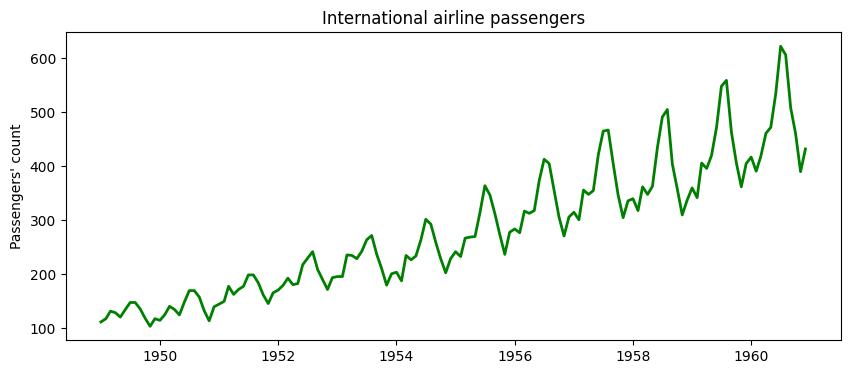

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(airlines_passengers, 'g', linewidth=2.)
plt.ylabel("Passengers' count")
plt.title('International airline passengers')
plt.show()

# Виден тренд, значит, ряд не стационарен и есть сезонность. А вот есть ли цикл сказать сложно, но не уверена, что есть. 

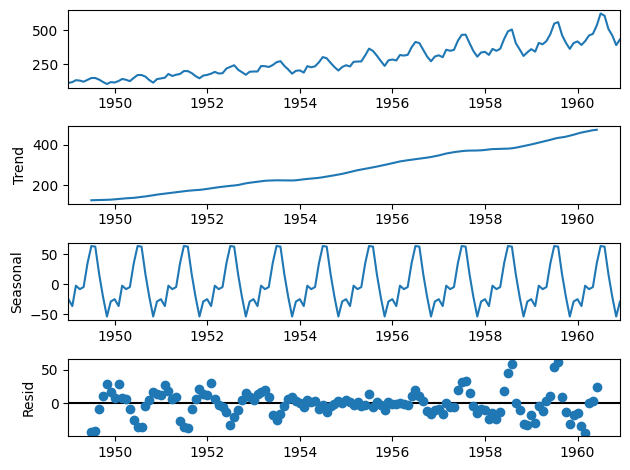

In [5]:
decompose = seasonal_decompose(airlines_passengers)
decompose.plot()
plt.show()

In [7]:
adf_test = adfuller(airlines_passengers)
print('p-value = ' + str(adf_test[1]))

p-value = 0.991880243437641


In [8]:
series = boxcox(airlines_passengers, 0)

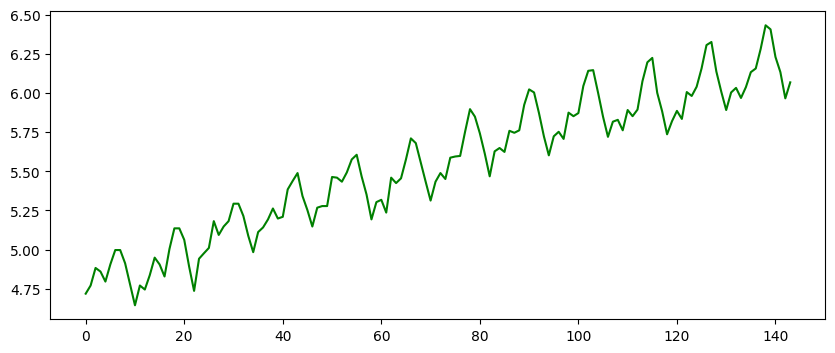

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(series, 'g')

# Пустой список в результате np.diff

In [10]:
series1 = np.diff(series)
series1

array([], shape=(144, 0), dtype=float64)

In [11]:
series = series[1:] - series[:-1]

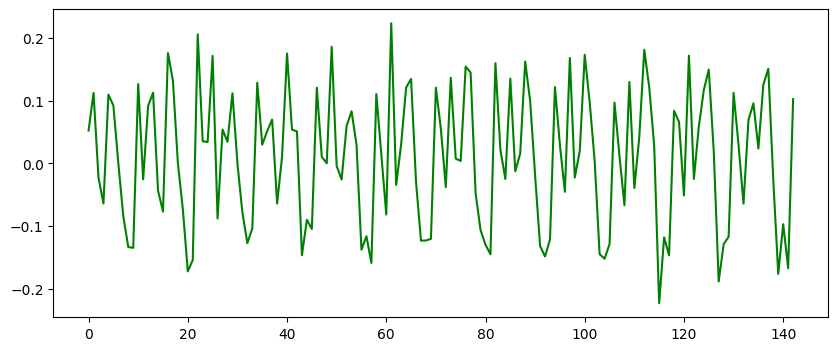

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(series, 'g')
plt.show()

In [13]:
adf_test_after = adfuller(series)
print('p-value = ' + str(adf_test_after[1]))    

p-value = 0.07112054815086184


In [14]:
series = series[1:] - series[:-1]

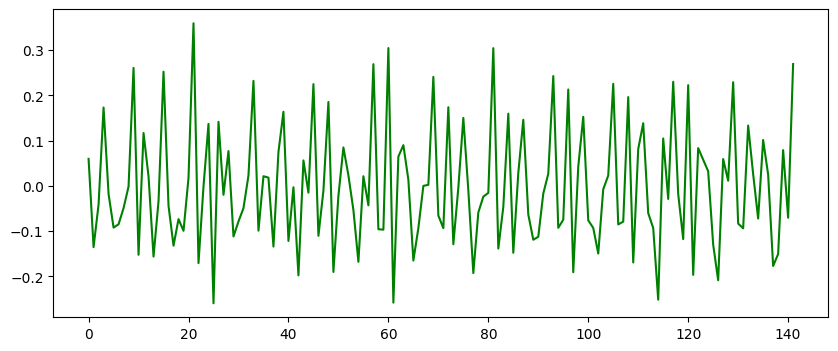

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(series, 'g')
plt.show()

In [16]:
adf_test_after = adfuller(series)
print('p-value = ' + str(adf_test_after[1]))    

p-value = 7.419304549376186e-13


In [18]:
female_births = pd.read_csv('daily-total-female-births-in-cal.csv', index_col='Date', parse_dates=True)
female_births.head(2)

,Count
Date,
1959-01-01,35
1959-01-02,32


In [19]:
female_births.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


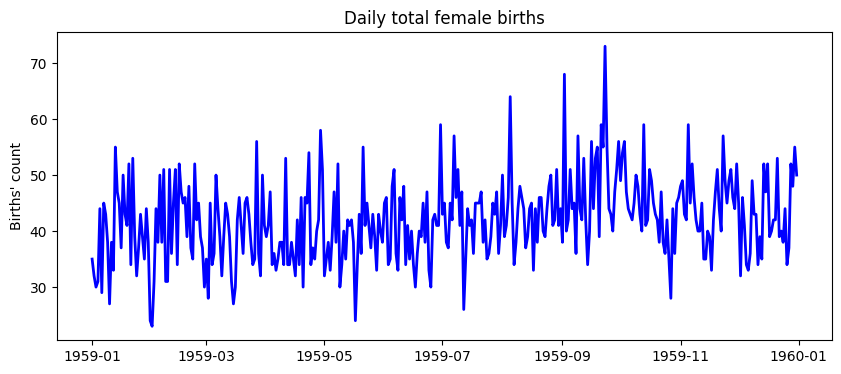

In [20]:
plt.figure(figsize=(10, 4))
plt.plot(female_births, 'b', linewidth=2.)
plt.ylabel("Births' count")
plt.title('Daily total female births')
plt.show()

# Похожее на стационарность, надо проверять дополнительно

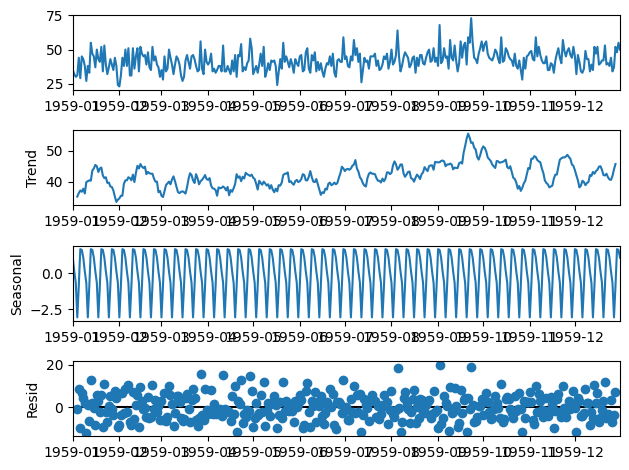

In [21]:
decompose = seasonal_decompose(female_births)
decompose.plot()
plt.show()

In [24]:
adf_test = adfuller(female_births)
print('p-value = ' + str(adf_test[1]))

# p-value меньше 0.05, значит, ряд стационарен

p-value = 5.2434129901498554e-05


In [27]:
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv", index_col='Month', parse_dates=True)
mean_monthly_temp.head(2)

,Deg
Month,
1920-01-01,40.6
1920-02-01,40.8


In [28]:
mean_monthly_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1920-01-01 to 1939-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Deg     240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


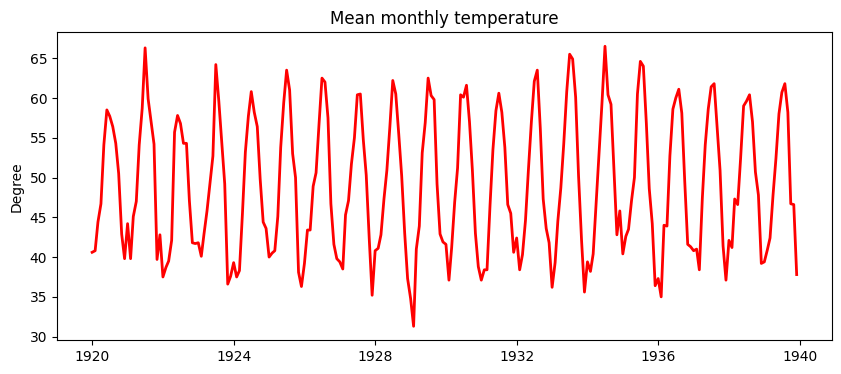

In [30]:
plt.figure(figsize=(10, 4))
plt.plot(mean_monthly_temp, 'r', linewidth=2.)
plt.ylabel("Degree")
plt.title('Mean monthly temperature')
plt.show()

# Ряд, похоже, стационарный, но проверю дальше

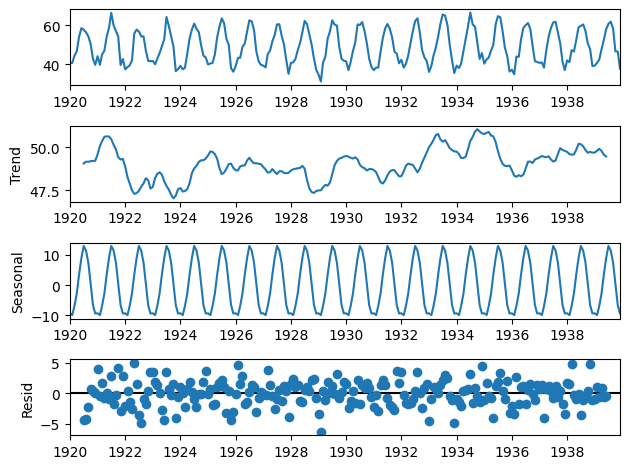

In [31]:
decompose = seasonal_decompose(mean_monthly_temp)
decompose.plot()
plt.show()

In [32]:
adf_test = adfuller(mean_monthly_temp)
print('p-value = ' + str(adf_test[1]))

# стационарный ряд

p-value = 0.016989030222608604


In [35]:
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv", index_col='Month', parse_dates=True)
robberies_in_boston.head(2)

,Count
Month,
1966-01-01,41
1966-02-01,39


In [36]:
robberies_in_boston.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 1966-01-01 to 1975-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   118 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


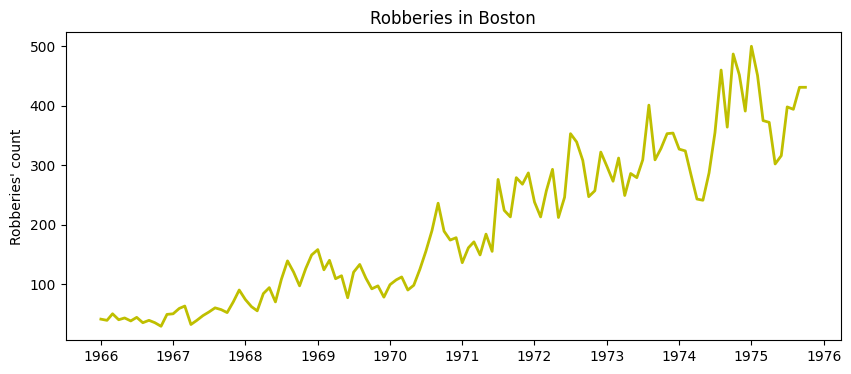

In [41]:
plt.figure(figsize=(10, 4))
plt.plot(robberies_in_boston, 'y', linewidth=2.)
plt.ylabel("Robberies' count")
plt.title('Robberies in Boston')
plt.show()

# Ряд не стационарный, так как ярко выражен тренд

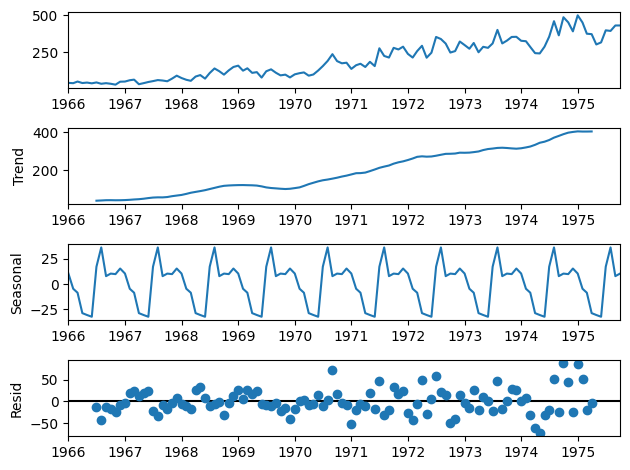

In [39]:
decompose = seasonal_decompose(robberies_in_boston)
decompose.plot()
plt.show()

In [40]:
adf_test = adfuller(robberies_in_boston)
print('p-value = ' + str(adf_test[1]))

# ну очень далёк от стационарности 

p-value = 0.994277563805723


In [42]:
series = boxcox(robberies_in_boston, 0)

In [45]:
adf_test = adfuller(series)
print('p-value = ' + str(adf_test[1]))

p-value = 0.2808325035425525


In [46]:
series = series[1:] - series[:-1]

In [47]:
adf_test = adfuller(series)
print('p-value = ' + str(adf_test[1]))

p-value = 2.3786024417437596e-11


In [50]:
sales_of_company = pd.read_csv("monthly-sales-of-company-x-jan-6.csv", index_col='Month', parse_dates=True)
sales_of_company.head(2)

,Count
Month,
1965-01-01,154
1965-02-01,96


In [51]:
sales_of_company.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 1965-01-01 to 1971-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   77 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


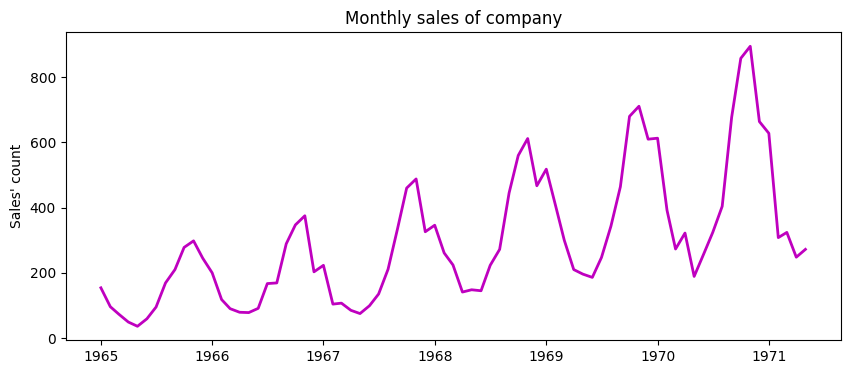

In [55]:
plt.figure(figsize=(10, 4))
plt.plot(sales_of_company, 'm', linewidth=2.)
plt.ylabel("Sales' count")
plt.title('Monthly sales of company')
plt.show()

# Ряд не стационарный, есть, мне кажется, тренд и сезонность

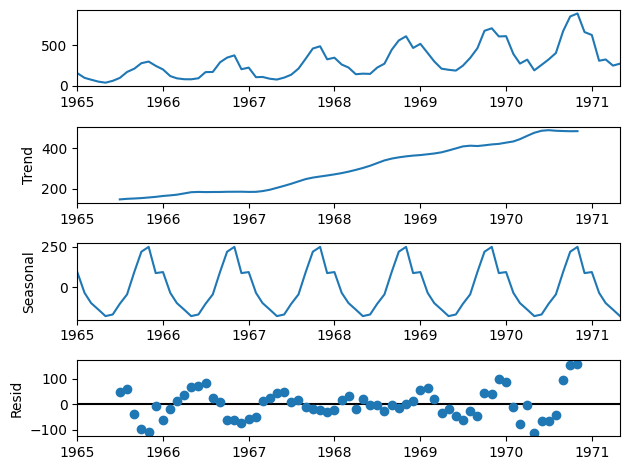

In [56]:
decompose = seasonal_decompose(sales_of_company)
decompose.plot()
plt.show()

In [57]:
adf_test = adfuller(sales_of_company)
print('p-value = ' + str(adf_test[1]))

# ряд далёк от стационарности 

p-value = 0.9888894205170052


In [60]:
series = boxcox(sales_of_company, 0)

In [61]:
adf_test = adfuller(series)
print('p-value = ' + str(adf_test[1]))

p-value = 0.7853102124849111


In [62]:
series = series[1:] - series[:-1]

In [63]:
adf_test = adfuller(series)
print('p-value = ' + str(adf_test[1]))

p-value = 0.024025392839875176


In [86]:
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Close']
dowjones_closing.head(2)

0    890.19
1    901.80
Name: Close, dtype: float64

In [87]:
dowjones_closing.info()

<class 'pandas.core.series.Series'>
RangeIndex: 162 entries, 0 to 161
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
162 non-null    float64
dtypes: float64(1)
memory usage: 1.4 KB


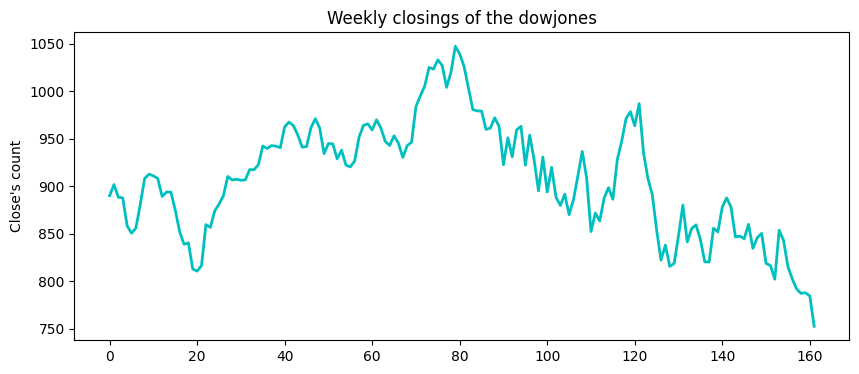

In [88]:
plt.figure(figsize=(10, 4))
plt.plot(dowjones_closing, 'c', linewidth=2.)
plt.ylabel("Close's count")
plt.title('Weekly closings of the dowjones')
plt.show()

# Ряд не стационарный

In [95]:
adf_test = adfuller(dowjones_closing)
print('p-value = ' + str(adf_test[1]))

p-value = 0.6224548515589733


In [99]:
series = boxcox(dowjones_closing, 0)

In [100]:
adf_test = adfuller(series)
print('p-value = ' + str(adf_test[1]))

# странно, но результат хуже после применения boxcox

p-value = 0.6691194827577219


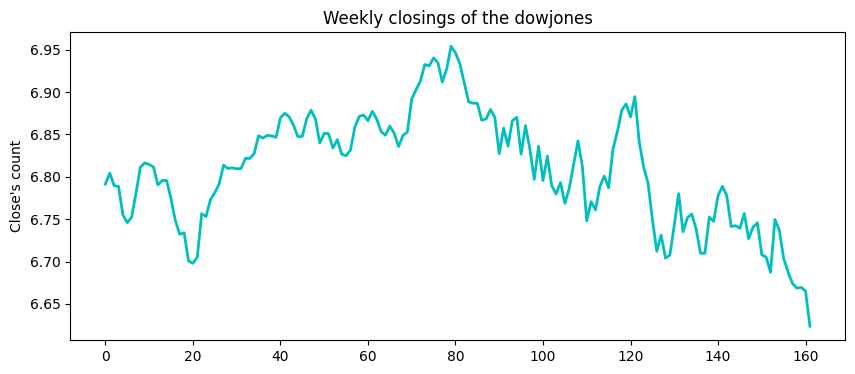

In [101]:
plt.figure(figsize=(10, 4))
plt.plot(series, 'c', linewidth=2.)
plt.ylabel("Close's count")
plt.title('Weekly closings of the dowjones')
plt.show()

# как интересно, но график визуально почти не изменился после уменьшения дисперсии

In [102]:
series = series[3:] - series[:-3] # возьму 3 лага

In [103]:
adf_test = adfuller(series)
print('p-value = ' + str(adf_test[1]))

p-value = 0.010064529357391763


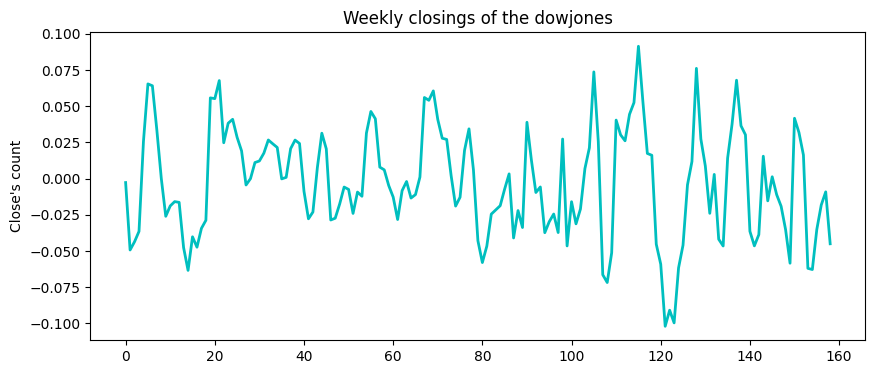

In [104]:
plt.figure(figsize=(10, 4))
plt.plot(series, 'c', linewidth=2.)
plt.ylabel("Close's count")
plt.title('Weekly closings of the dowjones')
plt.show()